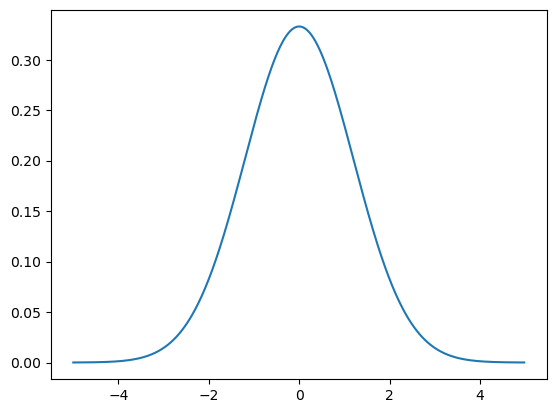

/Users/fend/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

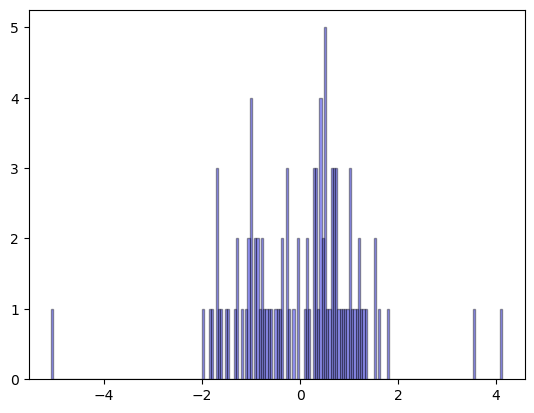

In [91]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy import optimize


#fit data using OLS 
'''I google a package that can calculate OLS'''
data = pd.read_csv('problem2.csv')
x = data['x'].tolist()
y = data['y'].tolist()
nx = sm.add_constant(x)
result = sm.OLS(y, nx).fit()
#get coef of const and b1
#print(result.params)
const=result.params[0]
b1=result.params[1]
#get summary
#print(result.summary())
eplison=[]
for i in range(len(x)):
    e = y[i]-const - b1*x[i]
    eplison.append(e)
    
mean=np.mean(eplison)
stdv=np.std(eplison)

x_axis = np.arange(-5, 5, 0.02)
plt.plot(x_axis, norm.pdf(x_axis, mean, stdv))
plt.show()
sns.distplot(eplison, hist=True, kde=False, 
             bins=int(1000/5), color = 'blue',
             hist_kws={'edgecolor':'black'})







In [102]:
values = pd.read_csv('problem2.csv')
y = values.y
x = values.x
#Fit data using MLE 

def MLE_Norm(parameters):
    const, beta, std_dev = parameters
    epsilon = y - const - beta*x
    LL = np.sum(stats.norm.logpdf(epsilon, 0, std_dev))
    neg_LL = -1*LL
    return neg_LL 

MLEN=optimize.minimize(MLE_Norm, np.array([1,1,1]), method='l-bfgs-b')
print(MLEN)

def MLE_T(parameters):
    const, beta, std_dev, n = parameters
    epsilon = y - const - beta*x
    LL = np.sum(stats.t.logpdf(epsilon,n, 0, std_dev))
    neg_LL = -1*LL
    return neg_LL 

MLET=optimize.minimize(MLE_T, np.array([1,1,1,1]), method='l-bfgs-b')
print(MLET)





      fun: 159.99209669024472
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.68434189e-06, -3.58113537e-04,  1.96109796e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.11983613, 0.60519946, 1.19839553])
      fun: 155.4729704162898
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.53477231e-04, -6.25277604e-04,  5.03064254e-04, -1.98951967e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 15
     njev: 18
   status: 0
  success: True
        x: array([0.14261187, 0.55756343, 0.97126815, 6.27649599])
